In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfOil = pd.read_excel('FOB.xlsx')
dfOil.head()

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<Axes: title={'center': 'Oil price variation'}, xlabel='Date', ylabel='Price'>

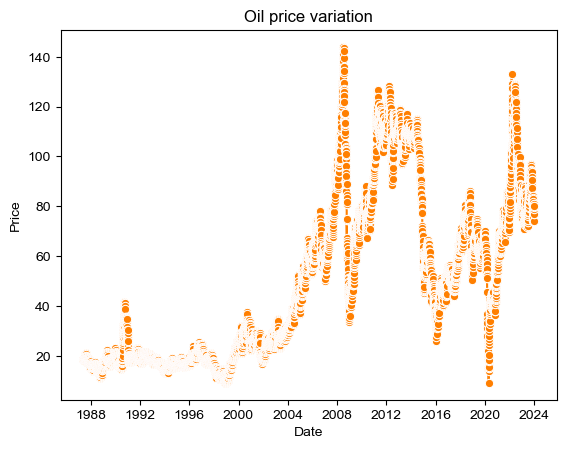

In [3]:
linha_cor = sns.color_palette("Paired")[7]
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil price variation')
sns.set(style="whitegrid") 
sns.lineplot(x='date', y='price', data=dfOil, marker='o', color = linha_cor)

In [4]:
msk = (dfOil.index < len(dfOil)-30)
df_train = dfOil[msk].copy()
df_test= dfOil[~msk].copy()

In [8]:
from statsmodels.tsa.stattools import *

ImportError: cannot import name 'windows' from partially initialized module 'scipy.signal' (most likely due to a circular import) (c:\Users\User\anaconda3\lib\site-packages\scipy\signal\__init__.py)